In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_boston
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
boston_dataset = load_boston()
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
boston_df[boston_df.isnull().any(axis=1)] #See the rows with null values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


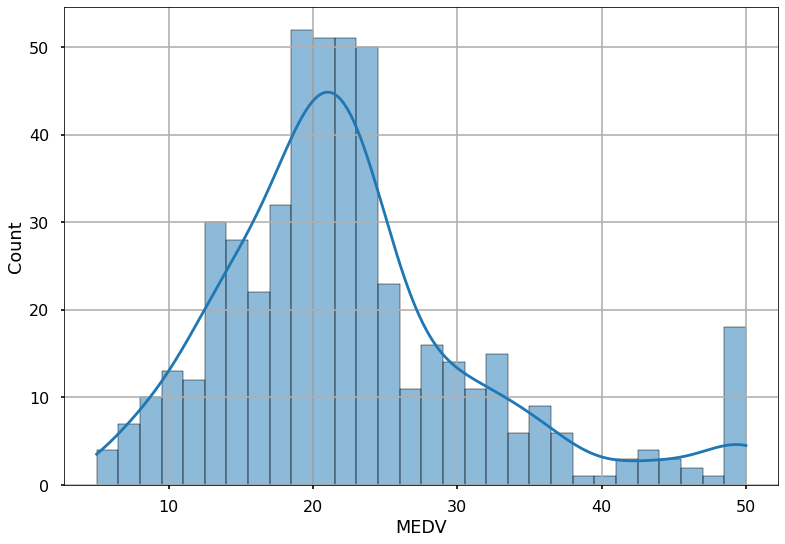

In [5]:
plt.style.use('seaborn-poster')
sb.histplot(boston_df['MEDV'], bins=30,kde = True)
plt.grid(True)
plt.show()

In [6]:
correlation_matrix = boston_df.corr().round(2)
correlation_matrix[abs(correlation_matrix['MEDV']) > 0.5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
PTRATIO,0.29,-0.39,0.38,-0.12,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51
LSTAT,0.46,-0.41,0.60,-0.05,0.59,-0.61,0.60,-0.50,0.49,0.54,0.37,-0.37,1.00,-0.74
MEDV,-0.39,0.36,-0.48,0.18,-0.43,0.70,-0.38,0.25,-0.38,-0.47,-0.51,0.33,-0.74,1.00


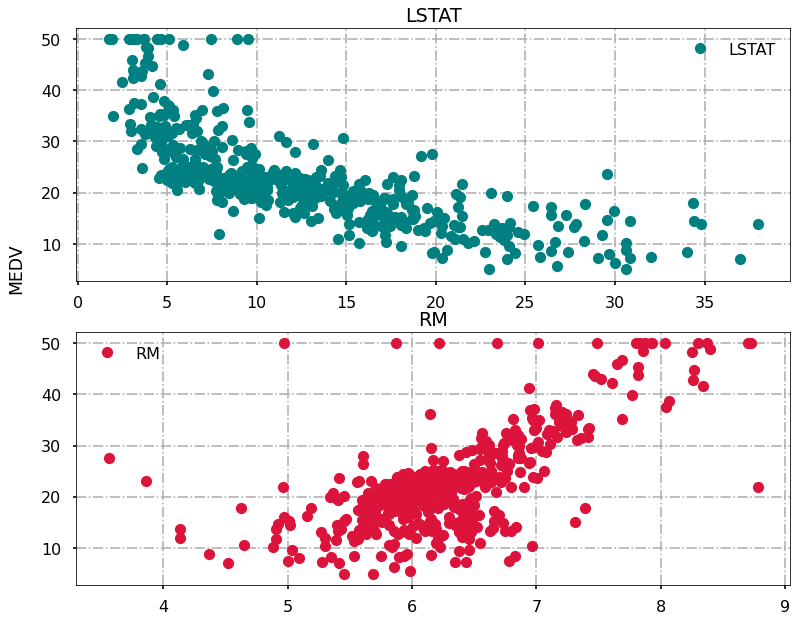

In [7]:
fig, ax = plt.subplots(2)
ax[0].plot(boston_df['LSTAT'], boston_df['MEDV'],'o', label = 'LSTAT', color = 'teal')
ax[1].plot(boston_df['RM'], boston_df['MEDV'],'o', label = 'RM', color = 'crimson')

ax[0].grid(True, linestyle='-.')
ax[1].grid(True, linestyle='-.')

ax[0].set_title('LSTAT')
ax[1].set_title('RM')


ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

fig.text(0.06, 0.5, 'MEDV', ha='center', va='center', rotation='vertical', fontsize =  'xx-large')

plt.subplots_adjust(bottom=0.000005)

## Machine learning

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential# import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import SGD, Adam

In [17]:
#Preparing data
x = np.array(pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns = ['LSTAT','RM']))
y = np.array(boston_df['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(X_train.shape, y_train.shape)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train) #En este caso, se hace el fit y transform al mismo tiempo
X_test_norm = scaler.transform(X_test)
scaler = MinMaxScaler()
y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_norm = scaler.transform(y_test.reshape(-1, 1))

print(X_train_norm.shape)
y_train_norm.shape

(379, 2) (379,)
(379, 2)


(379, 1)

### KNN regression

In [18]:
highest_val = [0,0]
train_scores = []
test_scores = []
Ks = [1,3,5,7,9,11,13,15,17,19]
for k in Ks:
    knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train) #Creates the object and trains it
    #y_predict_output = knnreg.predict(X_predict_input)#Predicts the output
    
    #Test the regression
    train_score = knnreg.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = knnreg.score(X_test, y_test)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [k, test_score]
    
    #print the outputs
    print('The score with K = {} is {} for the train set'.format(k, train_score))
    print('The score with K = {} is {} for the test set\n\n'.format(k, test_score))
print('The best K is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with K = 1 is 1.0 for the train set
The score with K = 1 is 0.5836735071461354 for the test set


The score with K = 3 is 0.8796371891081138 for the train set
The score with K = 3 is 0.6765933670326323 for the test set


The score with K = 5 is 0.8542771110490128 for the train set
The score with K = 5 is 0.6866349537902271 for the test set


The score with K = 7 is 0.8453863588122119 for the train set
The score with K = 7 is 0.6881827797539251 for the test set


The score with K = 9 is 0.8328289558315285 for the train set
The score with K = 9 is 0.6885929348034483 for the test set


The score with K = 11 is 0.8241974069546173 for the train set
The score with K = 11 is 0.6981889084117114 for the test set


The score with K = 13 is 0.821434381650862 for the train set
The score with K = 13 is 0.6995045015461896 for the test set


The score with K = 15 is 0.8165079688318012 for the train set
The score with K = 15 is 0.6966824217684973 for the test set


The score with K = 17 is 0

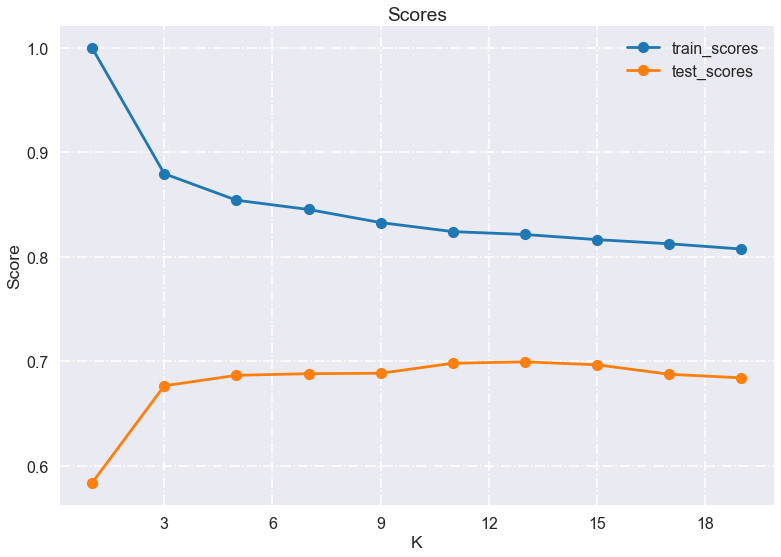

In [19]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
Ks = np.array(Ks)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(Ks,train_scores,'o-', label = 'train_scores')
ax.plot(Ks,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores')

ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.')
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('K')
plt.show()

#### KNN regression with pre processing

In [20]:
#Normalization
highest_val = [0,0]
train_scores = []
test_scores = []
Ks = [1,3,5,7,9,11,13,15,17,19]
for k in Ks:
    knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train_norm, y_train_norm) #Creates the object and trains it
    #y_predict_output = knnreg.predict(X_predict_input)#Predicts the output
    
    #Test the regression
    train_score = knnreg.score(X_train_norm, y_train)
    train_scores.append(train_score)
    test_score = knnreg.score(X_test_norm, y_test)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [k, test_score]
    
    #print the outputs
    print('The score with K = {} is {} for the train set'.format(k, train_score))
    print('The score with K = {} is {} for the test set\n'.format(k, test_score))

print('The best K is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with K = 1 is -5.742278246966717 for the train set
The score with K = 1 is -5.848579237457473 for the test set

The score with K = 3 is -5.74850134007669 for the train set
The score with K = 3 is -5.85824443957688 for the test set

The score with K = 5 is -5.7492928321153425 for the train set
The score with K = 5 is -5.856505490350235 for the test set

The score with K = 7 is -5.749964443130435 for the train set
The score with K = 7 is -5.85657113156166 for the test set

The score with K = 9 is -5.750497418529198 for the train set
The score with K = 9 is -5.856549441802068 for the test set

The score with K = 11 is -5.75072750389596 for the train set
The score with K = 11 is -5.857183002019096 for the test set

The score with K = 13 is -5.751325742717266 for the train set
The score with K = 13 is -5.85614704617196 for the test set

The score with K = 15 is -5.752041779234235 for the train set
The score with K = 15 is -5.8575325136792324 for the test set

The score with K = 17

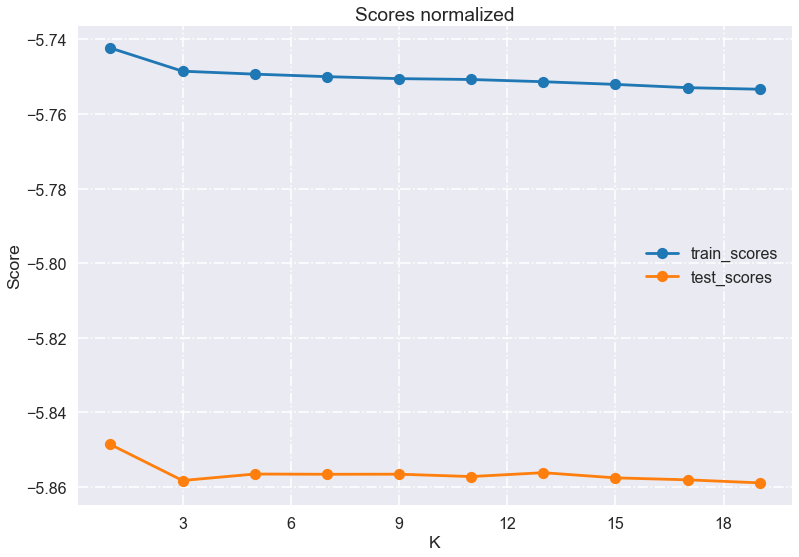

In [21]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
Ks = np.array(Ks)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(Ks,train_scores,'o-', label = 'train_scores')
ax.plot(Ks,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores normalized')

ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.')
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('K')
plt.show()

In [22]:
#Polinomial regression
highest_comb = [0,0,0]
for deg in range(1,7):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 0)
    
    train_scores = []
    test_scores = []
    Ks = [1,3,5,7,9,11,13,15,17,19]
    for k in Ks:
        knnreg = KNeighborsRegressor(n_neighbors = k).fit(X_train_poly, y_train_poly) #Creates the object and trains it
        #y_predict_output = knnreg.predict(X_predict_input)#Predicts the output

        #Test the regression
        train_score = knnreg.score(X_train_poly, y_train_poly)
        train_scores.append(train_score)
        test_score = knnreg.score(X_test_poly, y_test_poly)
        test_scores.append(test_score)

        #print the outputs
        print('The score with K = {} is {} for the train set, poly {}'.format(k, train_score, deg))
        print('The score with K = {} is {} for the test set, poly {}\n'.format(k, test_score, deg))
        if (test_score > highest_comb[1]):
            highest_comb = [k, test_score, deg]
        else:
            pass
        
    print('-'*40)
print('The best combination is K = {}, deg = {}, test score = {}'.format(highest_comb[0], highest_comb[2], highest_comb[1]))

The score with K = 1 is 1.0 for the train set, poly 1
The score with K = 1 is 0.5836735071461354 for the test set, poly 1

The score with K = 3 is 0.8796371891081138 for the train set, poly 1
The score with K = 3 is 0.6765933670326323 for the test set, poly 1

The score with K = 5 is 0.8542771110490128 for the train set, poly 1
The score with K = 5 is 0.6866349537902271 for the test set, poly 1

The score with K = 7 is 0.8453863588122119 for the train set, poly 1
The score with K = 7 is 0.6881827797539251 for the test set, poly 1

The score with K = 9 is 0.8328289558315285 for the train set, poly 1
The score with K = 9 is 0.6885929348034483 for the test set, poly 1

The score with K = 11 is 0.8241974069546173 for the train set, poly 1
The score with K = 11 is 0.6981889084117114 for the test set, poly 1

The score with K = 13 is 0.821434381650862 for the train set, poly 1
The score with K = 13 is 0.6995045015461896 for the test set, poly 1

The score with K = 15 is 0.8165079688318012 fo

### Linear regression

In [23]:
linreg = LinearRegression().fit(X_train, y_train)
print('The score for linear regression is {}'.format(linreg.score(X_test, y_test)))

The score for linear regression is 0.5692445415835344


#### Linear regression with pre processing


In [24]:
#With normalization
linreg = LinearRegression().fit(X_train_norm, y_train_norm)
print('The score for linear regression normalized  is {}'.format(linreg.score(X_test_norm, y_test_norm)))

The score for linear regression normalized  is 0.569244541583535


In [26]:
#Polynomial regression
train_scores = []
test_scores = []
highest_comb = [0,0]
for deg in range(1,10):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 0)
    
    linreg = LinearRegression().fit(X_train_poly, y_train_poly)
    
    #Test the regression
    train_score = linreg.score(X_train_poly, y_train_poly)
    train_scores.append(train_score)
    test_score = linreg.score(X_test_poly, y_test_poly)
    test_scores.append(test_score)
    
    print('The score is {} for the train set deg = {}'.format(train_score, deg))
    print('The score is {} for the test set deg = {}\n'.format(test_score, deg))
    
    if (test_score > highest_comb[0]):
        highest_comb = [test_score, deg]
        
print('The best deg is {} with a test score of {}'.format(highest_comb[1],highest_comb[0]))

The score is 0.65978465698869 for the train set deg = 1
The score is 0.5692445415835343 for the test set deg = 1

The score is 0.7815991971519615 for the train set deg = 2
The score is 0.6769812787320391 for the test set deg = 2

The score is 0.7991255537970334 for the train set deg = 3
The score is 0.6777880389816062 for the test set deg = 3

The score is 0.8382354273408261 for the train set deg = 4
The score is 0.590810809968352 for the test set deg = 4

The score is 0.851944279640625 for the train set deg = 5
The score is 0.588811326508592 for the test set deg = 5

The score is 0.8326409397291855 for the train set deg = 6
The score is 0.022461875940700815 for the test set deg = 6

The score is 0.8601174102558425 for the train set deg = 7
The score is 0.2253398822826126 for the test set deg = 7

The score is 0.7834339942124857 for the train set deg = 8
The score is -8.334116021354381 for the test set deg = 8

The score is 0.8603892494856213 for the train set deg = 9
The score is 0.03

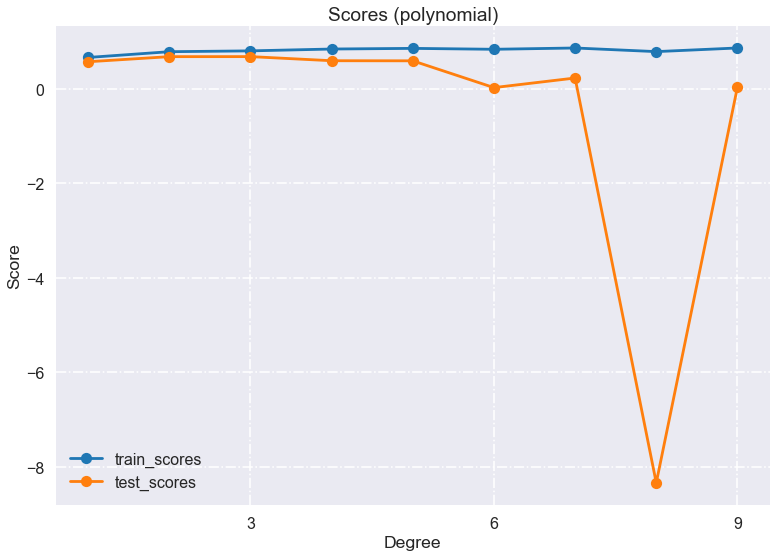

In [27]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
deg = np.array(list(range(1,10)))

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(deg,train_scores,'o-', label = 'train_scores')
ax.plot(deg,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores (polynomial)')

ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.')
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('Degree')
plt.show()

### Ridge regression

In [28]:
highest_val = [0,0]
train_scores = []
test_scores = []
alphas = [0, 1, 10, 20, 50, 100, 200]
for a in alphas:
    linridge = Ridge(alpha = a).fit(X_train, y_train) #Creates the object and trains it
    
    #Test the regression
    train_score = linridge.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = linridge.score(X_test, y_test)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [a, test_score]
    
    #print the outputs
    print('The score with alpha = {} is {} for the train set'.format(a, train_score))
    print('The score with alpha = {} is {} for the test set\n'.format(a, test_score))
print('The best alpha is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with alpha = 0 is 0.65978465698869 for the train set
The score with alpha = 0 is 0.5692445415835343 for the test set

The score with alpha = 1 is 0.6597780181770132 for the train set
The score with alpha = 1 is 0.5691622120420184 for the test set

The score with alpha = 10 is 0.659214316086401 for the train set
The score with alpha = 10 is 0.5678955106116741 for the test set

The score with alpha = 20 is 0.6578332498209034 for the train set
The score with alpha = 20 is 0.5657179723052062 for the test set

The score with alpha = 50 is 0.6516622693343299 for the train set
The score with alpha = 50 is 0.5572972756411864 for the test set

The score with alpha = 100 is 0.6407492509471093 for the train set
The score with alpha = 100 is 0.5434241496057189 for the test set

The score with alpha = 200 is 0.6244874428501344 for the train set
The score with alpha = 200 is 0.5235433953547253 for the test set

The best alpha is 0 with a test score of 0.5692445415835343


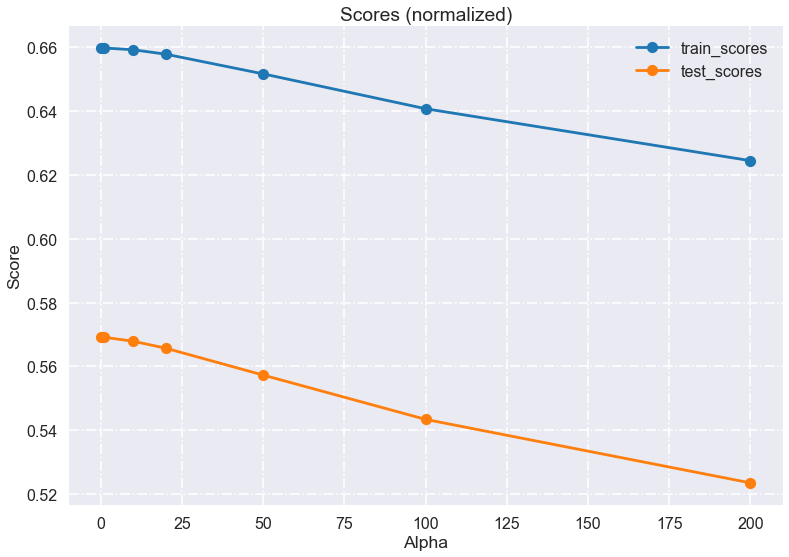

In [29]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
deg = np.array(alphas)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(deg,train_scores,'o-', label = 'train_scores')
ax.plot(deg,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores (normalized)')

#ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.', which="both")
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('Alpha')
plt.show()

#### Ridge regression with pre processing

In [30]:
#Normalization
highest_val = [0,0]
train_scores = []
test_scores = []
alphas = [0, 1, 10, 20, 50, 100, 200]
for a in alphas:
    linridge = Ridge(alpha = a).fit(X_train_norm, y_train_norm) #Creates the object and trains it
    
    #Test the regression
    train_score = linridge.score(X_train_norm, y_train_norm)
    train_scores.append(train_score)
    test_score = linridge.score(X_test_norm, y_test_norm)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [a, test_score]
    
    #print the outputs
    print('The score with alpha = {} is {} for the train set'.format(a, train_score))
    print('The score with alpha = {} is {} for the test set\n'.format(a, test_score))
print('The best alpha is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with alpha = 0 is 0.65978465698869 for the train set
The score with alpha = 0 is 0.569244541583535 for the test set

The score with alpha = 1 is 0.6573338262945467 for the train set
The score with alpha = 1 is 0.5711267686738827 for the test set

The score with alpha = 10 is 0.5740423233334553 for the train set
The score with alpha = 10 is 0.5149010035729621 for the test set

The score with alpha = 20 is 0.47844462709204993 for the train set
The score with alpha = 20 is 0.4347963273292783 for the test set

The score with alpha = 50 is 0.3074110786678831 for the train set
The score with alpha = 50 is 0.2827665827952446 for the test set

The score with alpha = 100 is 0.18999808292532205 for the train set
The score with alpha = 100 is 0.17541217958750654 for the test set

The score with alpha = 200 is 0.10726975738899314 for the train set
The score with alpha = 200 is 0.09889410801301479 for the test set

The best alpha is 1 with a test score of 0.5711267686738827


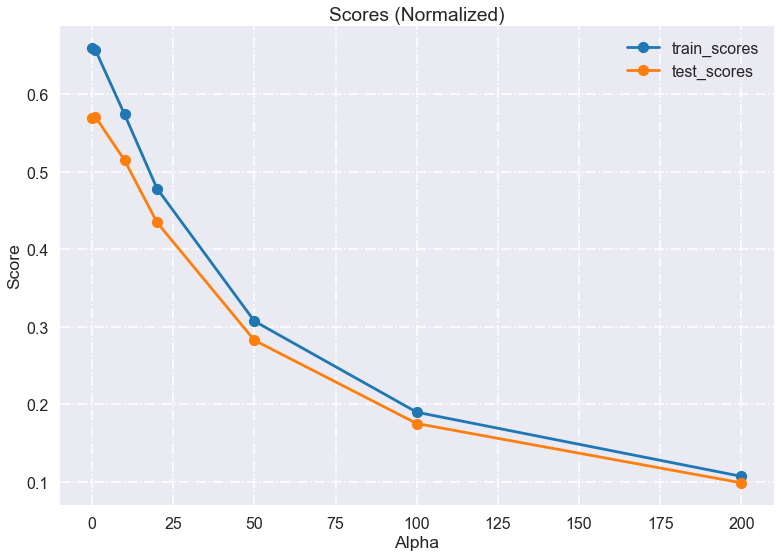

In [31]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
deg = np.array(alphas)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(deg,train_scores,'o-', label = 'train_scores')
ax.plot(deg,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores (Normalized)')

#ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.', which="both")
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('Alpha')
plt.show()

In [32]:
#Polynomial regression
train_scores = []
test_scores = []
highest_comb = [0,0,0]
alphas = [0, 1, 10, 20, 50, 100, 200]
for deg in range(1,7):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, random_state = 0)
    
    for a in alphas:
        linridge = Ridge(alpha = a).fit(X_train_poly, y_train_poly) #Creates the object and trains it
        train_score = linridge.score(X_train_poly, y_train_poly)
        test_score = linridge.score(X_test_poly, y_test_poly)

        print('The score with alpha = {} is {} for the train set, deg = {}'.format(a, train_score,deg))
        print('The score with alpha = {} is {} for the test set, deg = {}\n'.format(a, test_score,deg))

        if (test_score > highest_comb[1]):
            highest_comb = [a, test_score, deg]
print('The best combination is alpha = {} with deg = {} with a score of {}'.format(highest_comb[0],highest_comb[2],highest_comb[1]))

The score with alpha = 0 is 0.65978465698869 for the train set, deg = 1
The score with alpha = 0 is 0.5692445415835343 for the test set, deg = 1

The score with alpha = 1 is 0.6597780181770132 for the train set, deg = 1
The score with alpha = 1 is 0.5691622120420183 for the test set, deg = 1

The score with alpha = 10 is 0.659214316086401 for the train set, deg = 1
The score with alpha = 10 is 0.567895510611674 for the test set, deg = 1

The score with alpha = 20 is 0.6578332498209035 for the train set, deg = 1
The score with alpha = 20 is 0.5657179723052062 for the test set, deg = 1

The score with alpha = 50 is 0.6516622693343299 for the train set, deg = 1
The score with alpha = 50 is 0.5572972756411864 for the test set, deg = 1

The score with alpha = 100 is 0.6407492509471093 for the train set, deg = 1
The score with alpha = 100 is 0.5434241496057188 for the test set, deg = 1

The score with alpha = 200 is 0.6244874428501344 for the train set, deg = 1
The score with alpha = 200 is 

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13495e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20557e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35833e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24628e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\rodri\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33546e-18): result may not be accurate

### Lasso regression

In [33]:
highest_val = [0,0]
train_scores = []
test_scores = []
alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]
for a in alphas:
    linlasso = Lasso(alpha = a, max_iter = 10000).fit(X_train, y_train) #Creates the object and trains it
    
    #Test the regression
    train_score = linlasso.score(X_train, y_train)
    train_scores.append(train_score)
    test_score = linlasso.score(X_test, y_test)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [a, test_score]
    
    #print the outputs
    print('The score with alpha = {} is {} for the train set'.format(a, train_score))
    print('The score with alpha = {} is {} for the test set\n'.format(a, test_score))
print('The best alpha is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with alpha = 0.5 is 0.6510572796658806 for the train set
The score with alpha = 0.5 is 0.5574892430395321 for the test set

The score with alpha = 1 is 0.6248807148935415 for the train set
The score with alpha = 1 is 0.5253100952901784 for the test set

The score with alpha = 2 is 0.5705294033467136 for the train set
The score with alpha = 2 is 0.46071431165491583 for the test set

The score with alpha = 3 is 0.5693966663587966 for the train set
The score with alpha = 3 is 0.4615878809686861 for the test set

The score with alpha = 5 is 0.5657719079974619 for the train set
The score with alpha = 5 is 0.4620072081248926 for the test set

The score with alpha = 10 is 0.5487808531787055 for the train set
The score with alpha = 10 is 0.4553099590992964 for the test set

The score with alpha = 20 is 0.48081663390368 for the train set
The score with alpha = 20 is 0.40872017426476237 for the test set

The score with alpha = 50 is 0.005067098978501661 for the train set
The score with

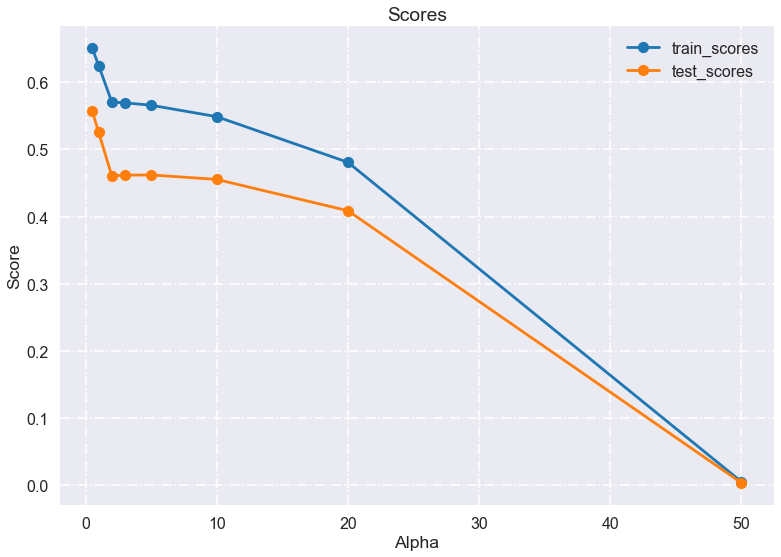

In [34]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
deg = np.array(alphas)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(deg,train_scores,'o-', label = 'train_scores')
ax.plot(deg,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores')

#ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.')
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('Alpha')
plt.show()

In [35]:
#Normalization
highest_val = [0,0]
train_scores = []
test_scores = []
alphas = [0.5, 1, 2, 3, 5, 10, 20, 50]
for a in alphas:
    linlasso = Lasso(alpha = a, max_iter = 10000).fit(X_train_norm, y_train_norm) #Creates the object and trains it
    
    #Test the regression
    train_score = linlasso.score(X_train_norm, y_train_norm)
    train_scores.append(train_score)
    test_score = linlasso.score(X_test_norm, y_test_norm)
    test_scores.append(test_score)
    
    if (test_score > highest_val[1]):
        highest_val = [a, test_score]
    
    #print the outputs
    print('The score with alpha = {} is {} for the train set'.format(a, train_score))
    print('The score with alpha = {} is {} for the test set\n'.format(a, test_score))
print('The best alpha is {} with a test score of {}'.format(highest_val[0],highest_val[1]))

The score with alpha = 0.5 is 0.0 for the train set
The score with alpha = 0.5 is -0.001119359203955561 for the test set

The score with alpha = 1 is 0.0 for the train set
The score with alpha = 1 is -0.001119359203955561 for the test set

The score with alpha = 2 is 0.0 for the train set
The score with alpha = 2 is -0.001119359203955561 for the test set

The score with alpha = 3 is 0.0 for the train set
The score with alpha = 3 is -0.001119359203955561 for the test set

The score with alpha = 5 is 0.0 for the train set
The score with alpha = 5 is -0.001119359203955561 for the test set

The score with alpha = 10 is 0.0 for the train set
The score with alpha = 10 is -0.001119359203955561 for the test set

The score with alpha = 20 is 0.0 for the train set
The score with alpha = 20 is -0.001119359203955561 for the test set

The score with alpha = 50 is 0.0 for the train set
The score with alpha = 50 is -0.001119359203955561 for the test set

The best alpha is 0 with a test score of 0


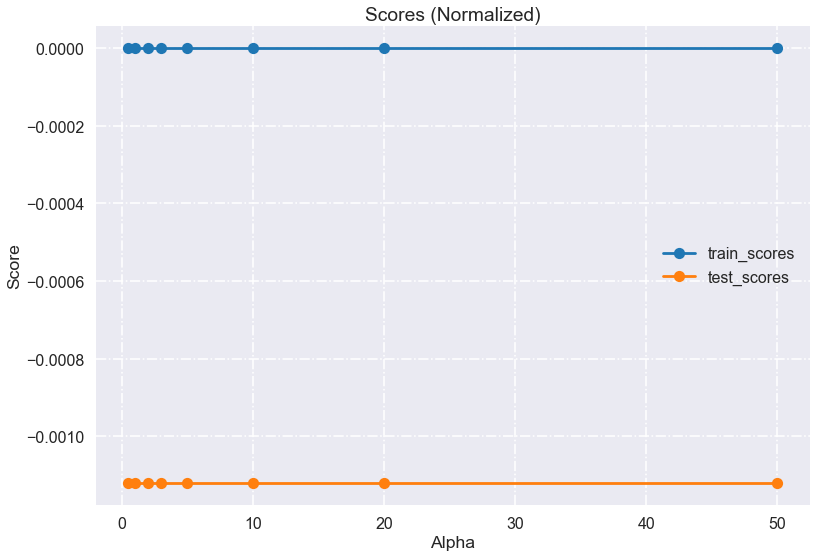

In [36]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
deg = np.array(alphas)

plt.style.use('seaborn-dark')
fig, ax = plt.subplots()
ax.plot(deg,train_scores,'o-', label = 'train_scores')
ax.plot(deg,test_scores,'o-', label = 'test_scores')

ax.set_title('Scores (Normalized)')

#ax.xaxis.set_major_locator(MultipleLocator(3))
ax.grid(True, linestyle='-.')
ax.legend(frameon=False)

plt.ylabel('Score')
plt.xlabel('Alpha')
plt.show()

## Deep Learning

In [40]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = 'relu',
                             alpha = 1.0,
                             solver = 'lbfgs').fit(X_train, y_train)
mlpreg.score(X_test, y_test)

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6749435658659102

In [ ]:
model = Sequential()
model.add(Dense(800, input_dim=2, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='MeanSquaredError',optimizer=Adam(learning_rate=0.005),metrics=['MeanSquaredError'])
model.fit(X_train,y_train,epochs=200,batch_size=40,shuffle=True,validation_data = (X_test, y_test))

In [ ]:
# model.save_weights('relu_Adam.HDF5')

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

In [ ]:
sb.histplot(boston_df['MEDV'], bins=30,kde = True, element="step")
sb.histplot(model.predict(x), bins=30,kde = True, color = "olive", element="step")
plt.grid(True)
plt.show()

In [ ]:
model1 = Sequential()
model1.add(Dense(800, input_dim=2, activation= "relu"))
model.add(Dropout(0.2))
model1.add(Dense(400, activation= "relu"))
model.add(Dropout(0.2))
model1.add(Dense(800, activation= "relu"))
model.add(Dropout(0.2))
model1.add(Dense(800, activation= "relu"))
model.add(Dropout(0.2))
model1.add(Dense(800, activation= "relu"))
model1.add(Dense(1, kernel_initializer='normal'))

model1.compile(loss='MeanSquaredError',optimizer=(learning_rate=0.00005),metrics=['MeanSquaredError'])
model1.fit(X_train,y_train,epochs=300,batch_size=40,shuffle=True,validation_data = (X_test, y_test))

In [ ]:
# model1.save_weights('relu_SGD.HDF5')

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, model1.predict(X_test))

In [ ]:
df_compare = pd.DataFrame()
df_compare['y'] = y
df_compare['y_Adam'] = model.predict(x)
df_compare['y_SGD'] = model1.predict(x)
df_compare['y_mlpreg'] = mlpreg.predict(x)
df_compare['y_av'] = (df_compare['y_SGD']+df_compare['y_Adam'])/2
sb.distplot(df_compare['y'],rug=True, hist=False)
sb.distplot(df_compare['y_Adam'],rug=True, hist=False)
sb.distplot(df_compare['y_SGD'],rug=True, hist=False)
sb.distplot(df_compare['y_mlpreg'],rug=True, hist=False)
plt.grid(True)
plt.show()

## Deep Learning w Normalization

In [54]:
# boston_df[['MEDV', 'LSTAT', 'RM']].values.shape

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(boston_df[['MEDV', 'LSTAT', 'RM']].values)
data_scaled[:,2].shape

x = np.array(pd.DataFrame(np.c_[data_scaled[:,1], data_scaled[:,2]], columns = ['LSTAT','RM']))
y = np.array(data_scaled[:,0])
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(x, y, random_state=0)

# X_train_norm = scaler.fit_transform(X_train) #En este caso, se hace el fit y transform al mismo tiempo
# X_test_norm = scaler.transform(X_test)
# scaler = MinMaxScaler()
# y_train_norm = scaler.fit_transform(y_train.reshape(-1, 1))
# y_test_norm = scaler.transform(y_test.reshape(-1, 1))

In [68]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = 'relu',
                             alpha = 1.0,
                             solver = 'lbfgs').fit(X_train_norm, y_train)
mlpreg.score(X_test_norm, y_test)

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6685920478497926